# **REGRESSION TASK**

Descrição da base de dados do Kaggle:

The dataset contains information about a group of test subjects and their sleep patterns. Each test subject is identified by a unique "Subject ID" and their age and gender are also recorded. The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, and the "Sleep duration" feature records the total amount of time each subject slept in hours. The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. The "Awakenings" feature records the number of times each subject wakes up during the night. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.

## **IMPORTS**

In [5]:
# Data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sampling data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Neural Networks
import tensorflow as tf
from tensorflow import keras

# Evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [11]:
PATH = "../data/Sleep_Efficiency.csv"
TARGET = "Sleep efficiency"

df = pd.read_csv(filepath_or_buffer=PATH).drop(columns="ID")
df.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [12]:
df.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


## **EXPLORATION DATA ANALYSIS**

### MISSING DATA ANALYSIS

In [13]:
pd.DataFrame(
    data={
        "Faltante (abs)":df.isnull().sum(),
        "Faltante (%)":round(((df.isnull().sum() /df.shape[0])*100),2)
    }
)

,Faltante (abs),Faltante (%)
Age,0,0.00
Gender,0,0.00
Bedtime,0,0.00
Wakeup time,0,0.00
Sleep duration,0,0.00
Sleep efficiency,0,0.00
REM sleep percentage,0,0.00
Deep sleep percentage,0,0.00
Light sleep percentage,0,0.00
Awakenings,20,4.42


### REGRESSION PLOT ANALYSIS

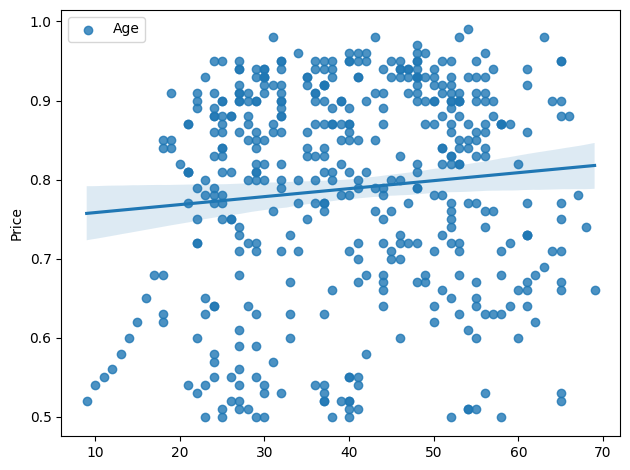

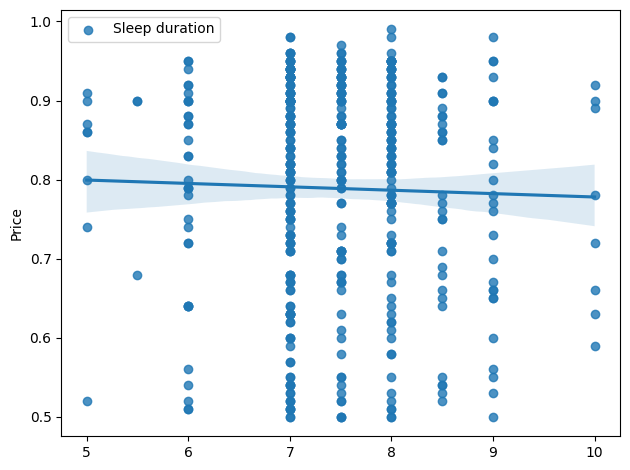

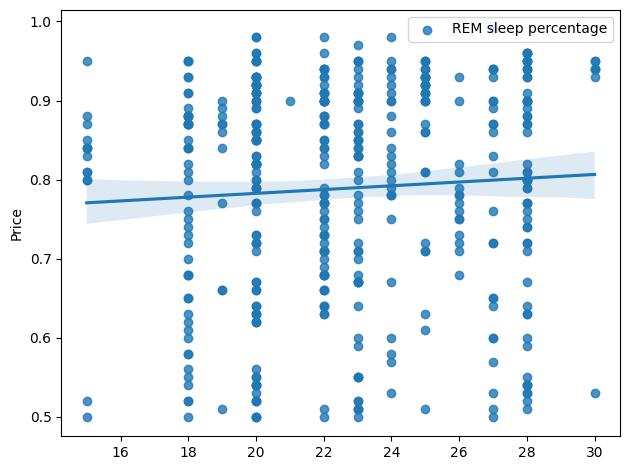

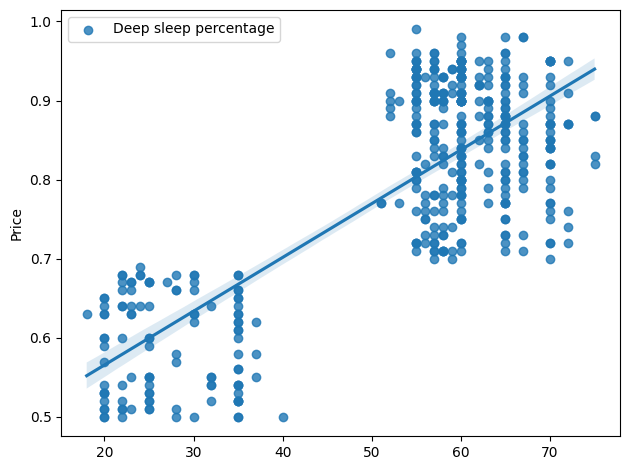

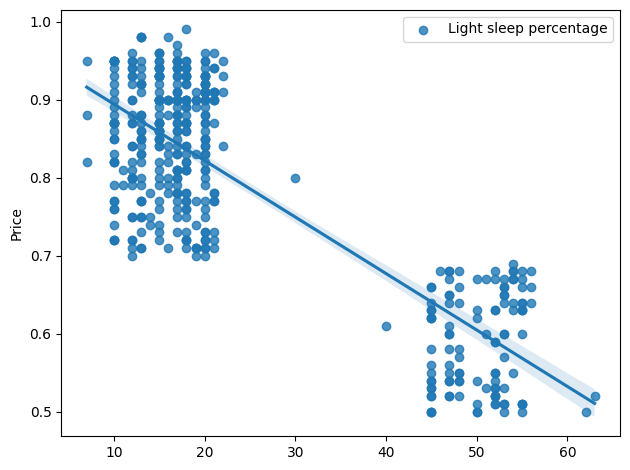

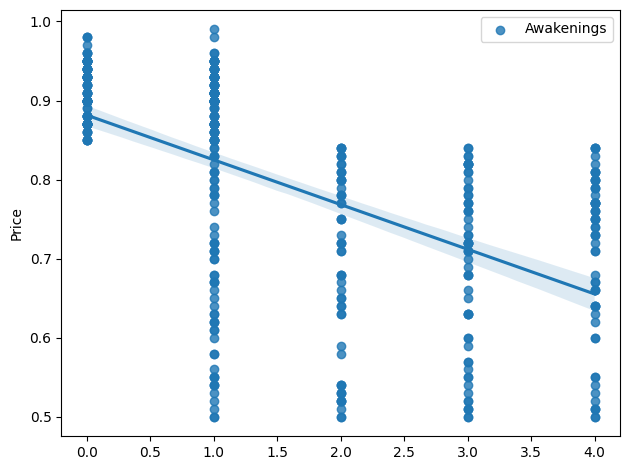

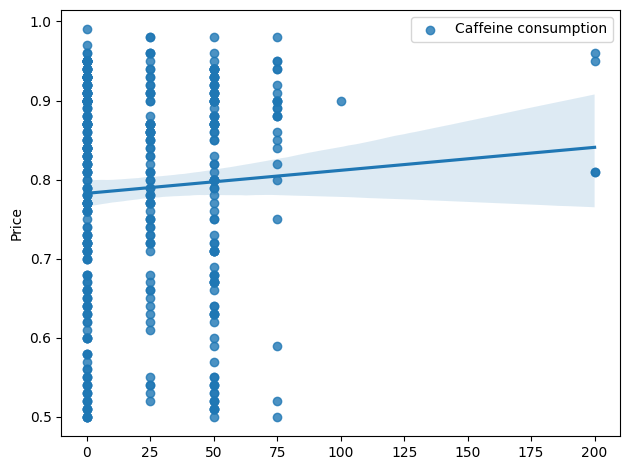

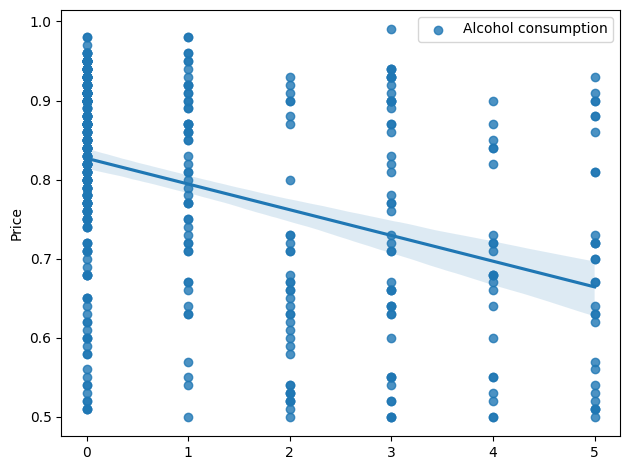

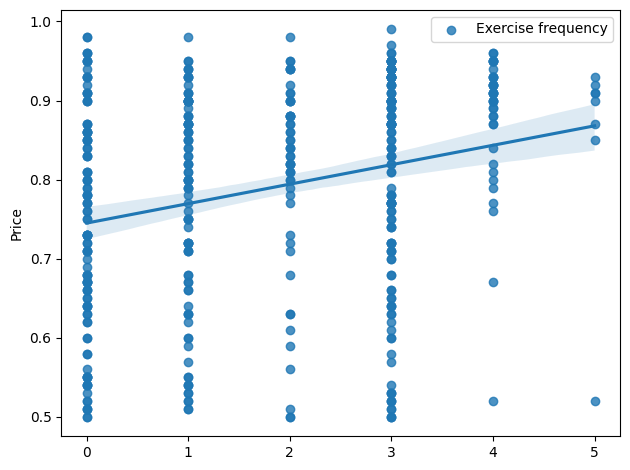

In [14]:
target = df[TARGET]
# we use a for loop to plot our independent variables against our dependent one:
for col in df.drop(
        columns=["Gender", "Smoking status", "Bedtime", "Wakeup time", TARGET]
    ):
    sns.regplot(x=df[col], y=target, data=df, label=col)
    plt.ylabel('Price')
    plt.xlabel('')
    plt.legend()
    plt.tight_layout()
    plt.show()


### BOXPLOT TARGET COLUMN

<Axes: ylabel='Sleep efficiency'>

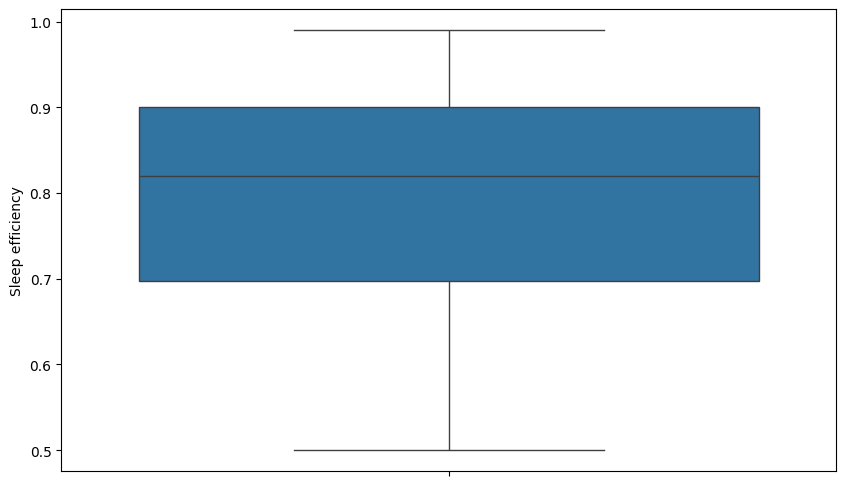

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(df[TARGET])

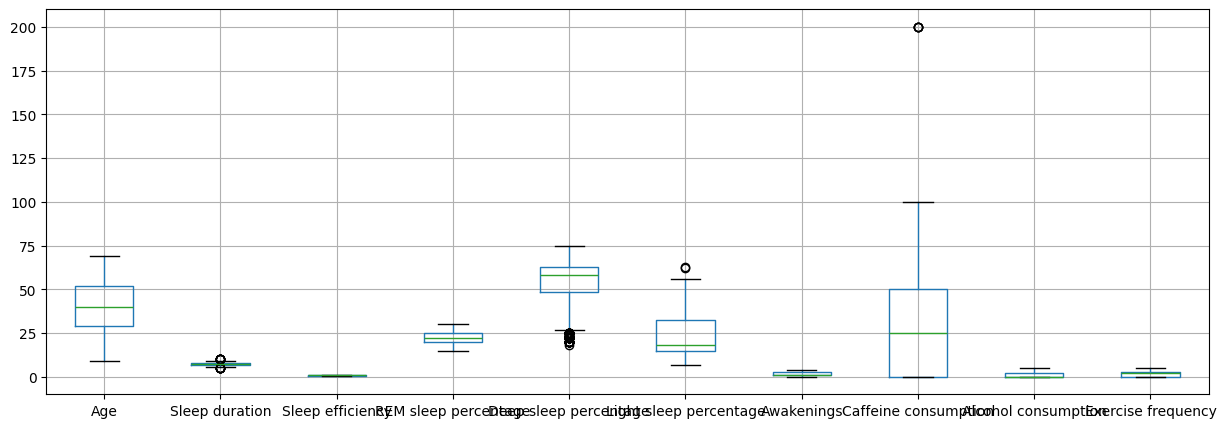

In [16]:
df.boxplot(figsize=(15, 5))
plt.show()

### HISTOGRAM TARGET COLUMN

<Axes: xlabel='Sleep efficiency', ylabel='Count'>

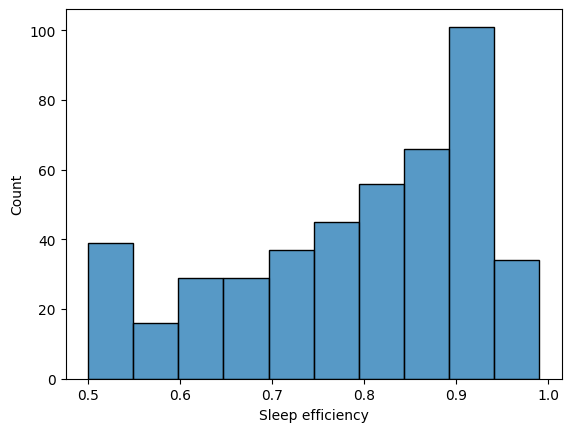

In [17]:
sns.histplot(df[TARGET])

### HISTOGRAM ALL COLUMNS

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep duration'}>,
        <Axes: title={'center': 'Sleep efficiency'}>],
       [<Axes: title={'center': 'REM sleep percentage'}>,
        <Axes: title={'center': 'Deep sleep percentage'}>,
        <Axes: title={'center': 'Light sleep percentage'}>],
       [<Axes: title={'center': 'Awakenings'}>,
        <Axes: title={'center': 'Caffeine consumption'}>,
        <Axes: title={'center': 'Alcohol consumption'}>],
       [<Axes: title={'center': 'Exercise frequency'}>, <Axes: >,
        <Axes: >]], dtype=object)

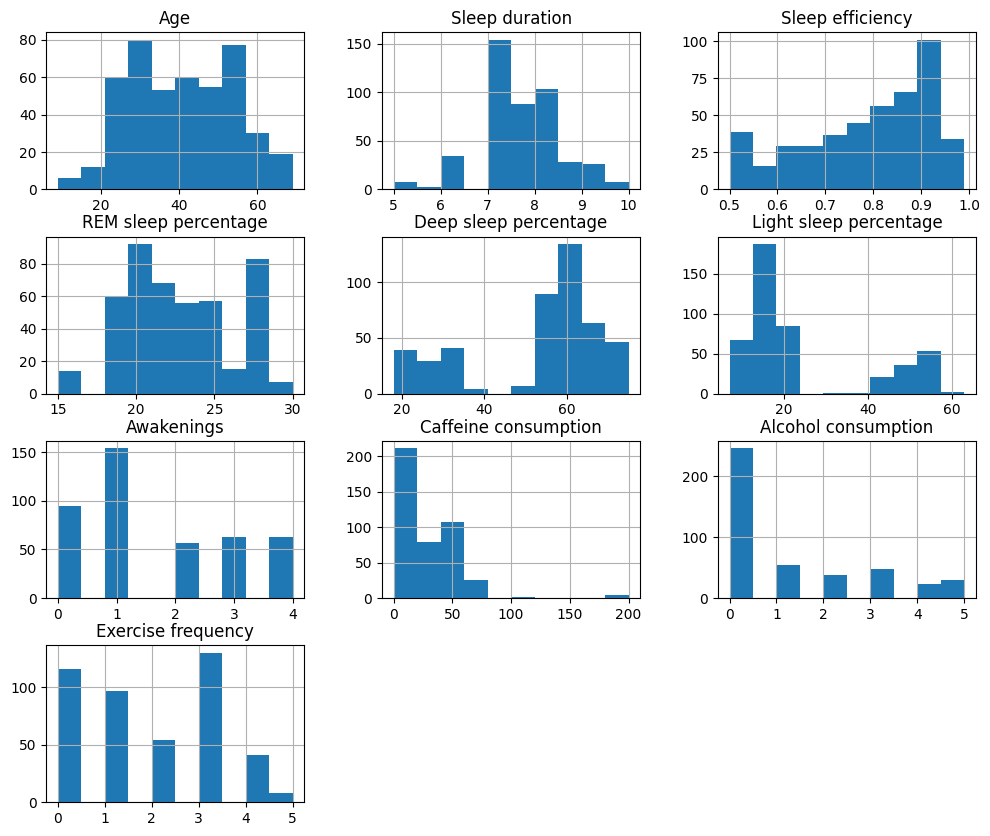

In [18]:
df.hist(figsize=(12, 10))

### CORRELATION MATRIX

Text(0.5, 1.0, 'Mapa Térmico da Correlação')

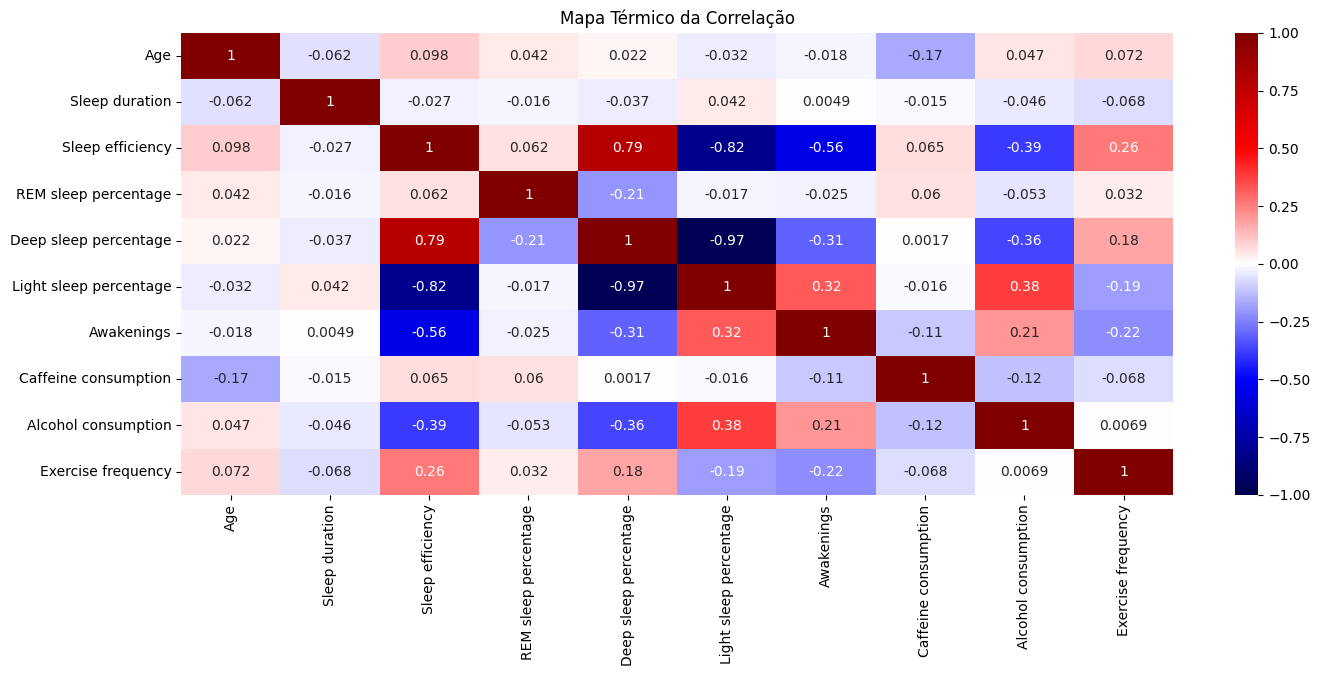

In [19]:
plt.figure(figsize=(16,6))
heatmap_corr = sns.heatmap(
    df.drop(
        columns=["Gender", "Smoking status", "Bedtime", "Wakeup time"]
    ).corr(),
    cmap='seismic', vmin=-1, vmax=1, annot=True)
plt.title('Mapa Térmico da Correlação')

## **PRE-PROCESSING**

### ONE HOT ENCONDING

In [ ]:
df = pd.concat([df, pd.get_dummies(data=df["Gender"])], axis=1)
df = pd.concat([df, pd.get_dummies(data=df["Smoking status"], prefix="Smoking")], axis=1)

df = df.drop(columns=["Gender", "Smoking status"]) # Removendo colunas originais do OneHotEnconding

### FILL MISSING DATA WITH LOCAL METRICS

In [ ]:
pd.DataFrame(
    data={
        "Faltante (abs)":df.isnull().sum()[(df.isnull().sum() > 0)],
        "Faltante (%)":round(((df.isnull().sum()[(df.isnull().sum() > 0)] /df.shape[0])*100),2),
        "Média": df.drop(columns=["Bedtime", "Wakeup time"]).mean()[(df.isnull().sum() > 0)],
        "Mediana": df.drop(columns=["Bedtime", "Wakeup time"]).median()[(df.isnull().sum() > 0)]
    }
)

,Faltante (abs),Faltante (%),Média,Mediana
Awakenings,20,4.42,1.641204,1.0
Caffeine consumption,25,5.53,23.653396,25.0
Alcohol consumption,14,3.10,1.173516,0.0
Exercise frequency,6,1.33,1.791480,2.0


In [22]:
df["Awakenings"] = df["Awakenings"].fillna(df["Awakenings"].median())
df["Caffeine consumption"] = df["Caffeine consumption"].fillna(df["Caffeine consumption"].median())
df["Alcohol consumption"] = df["Alcohol consumption"].fillna(df["Alcohol consumption"].mean())
df["Exercise frequency"] = df["Exercise frequency"].fillna(df["Exercise frequency"].mean())

### DATA TYPES DEFINITION

In [23]:
df = df.astype({
    'Age': "float",
    'Sleep duration': "float",
    'Sleep efficiency': "float",
    'REM sleep percentage': "float",
    'Deep sleep percentage': "float",
    'Light sleep percentage': "float",
    'Awakenings': "int",
    'Caffeine consumption': "float",
    'Alcohol consumption': "float",
    'Exercise frequency': "int",
    'Female': "bool",
    'Male': "bool",
    'Smoking_No': "bool",
    'Smoking_Yes': "bool"
})
df["Wakeup time"] = pd.to_datetime(df["Wakeup time"])
df["Bedtime"] = pd.to_datetime(df["Bedtime"])

### FEATURE ENGINEERING

#### Creating boolean column to track if person sleep at midnight

In [24]:
df.loc[(df["Bedtime"].dt.hour >= 0) & (df["Bedtime"].dt.hour <= 5), "Bedtime_Midnight"] = True
df["Bedtime_Midnight"] = df["Bedtime_Midnight"].fillna(value=False)

C:\Users\luan-\AppData\Local\Temp\ipykernel_9512\2516003994.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Bedtime_Midnight"] = df["Bedtime_Midnight"].fillna(value=False)


### DATA CLEANING

In [25]:
df = df.drop(columns=["Bedtime", "Wakeup time"])

### COLUMNS NAME TREATMENT

In [26]:
df.columns = df.columns.str.replace(" ", "_")

### SAMPLING DATA

In [27]:
X = df.drop(columns="Sleep_efficiency")
y = df["Sleep_efficiency"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2025, shuffle=True)

### DATA NORMALIZATION (Z-Score)

In [ ]:
scaler = StandardScaler().fit(X_train) # Média e desvio padrão calculados a partir do conjunto de treinamento   
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test) # Aplicar normalização com média e desvio padrão do conjunto de treinamento

In [30]:
df_train = pd.DataFrame(columns=X_train.columns, data=X_train_norm)
df_train["Sleep_efficiency"] = y_train.values

df_test = pd.DataFrame(columns=X_test.columns, data=X_test_norm)
df_test["Sleep_efficiency"] = y_test.values

### SAVING PROCESSED DATA

In [31]:
df_train.to_csv("../data/train.csv")
df_test.to_csv("../data/test.csv")

## **MODELS TRAINING AND EVALUATION**

In [6]:
df_train = pd.read_csv("../data/train.csv").drop(columns="Unnamed: 0")
df_test = pd.read_csv("../data/test.csv").drop(columns="Unnamed: 0")

display(df_train.shape)
display(df_test.shape)

(339, 15)

(113, 15)

In [7]:
X_train = df_train.drop(columns="Sleep_efficiency")
y_train = df_train["Sleep_efficiency"]

X_test = df_test.drop(columns="Sleep_efficiency")
y_test = df_test["Sleep_efficiency"]

### KNN

In [4]:
knn = KNeighborsRegressor(n_jobs=-1)
knn = knn.fit(X=X_train, y=y_train)
knn_pred = knn.predict(X_test)

In [5]:
print("R² Score:", r2_score(y_true=y_test, y_pred=knn_pred))
print("MAE:", mean_absolute_error(y_true=y_test, y_pred=knn_pred))
print("MSE:", mean_squared_error(y_true=y_test, y_pred=knn_pred))

R² Score: 0.7994651157036505
MAE: 0.050070796460176994
MSE: 0.004189132743362831


### LINEAR REGRESSION

In [9]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X=X_train, y=y_train)
linear_reg_pred = linear_reg.predict(X_test)

In [10]:
print("R² Score:", r2_score(y_true=y_test, y_pred=linear_reg_pred))
print("MAE:", mean_absolute_error(y_true=y_test, y_pred=linear_reg_pred))
print("MSE:", mean_squared_error(y_true=y_test, y_pred=linear_reg_pred))

R² Score: 0.8187156627532528
MAE: 0.049252064211419214
MSE: 0.003786992750333181


### RANDOM FOREST

In [4]:
rf = RandomForestRegressor(n_jobs=-1)
rf = rf.fit(X=X_train, y=y_train)
rf_pred = rf.predict(X_test)

In [5]:
print("R² Score:", r2_score(y_true=y_test, y_pred=rf_pred))
print("MAE:", mean_absolute_error(y_true=y_test, y_pred=rf_pred))
print("MSE:", mean_squared_error(y_true=y_test, y_pred=rf_pred))

R² Score: 0.8758907015698326
MAE: 0.04012389380530974
MSE: 0.002592617876106196


### MULTILAYER PERCEPTRON

In [14]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_acc(history):
    plt.plot(history.history['mae'], label='mae')
    plt.plot(history.history['val_mae'], label='val_mae')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.grid(True)
    plt.show()

In [20]:
tf.random.set_seed(1)

In [21]:
mlp = keras.Sequential([
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1),
])

mlp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
mlp.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mae']
)

In [23]:
history = mlp.fit(
    X_train, y_train,
    epochs=25,
    validation_split = 0.25,
    batch_size=10,
    verbose=1,
)

Epoch 1/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4886 - mae: 0.4886 - val_loss: 0.3441 - val_mae: 0.3441
Epoch 2/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3136 - mae: 0.3136 - val_loss: 0.2523 - val_mae: 0.2523
Epoch 3/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2239 - mae: 0.2239 - val_loss: 0.1839 - val_mae: 0.1839
Epoch 4/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1740 - mae: 0.1740 - val_loss: 0.1429 - val_mae: 0.1429
Epoch 5/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1407 - mae: 0.1407 - val_loss: 0.1107 - val_mae: 0.1107
Epoch 6/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1174 - mae: 0.1174 - val_loss: 0.0969 - val_mae: 0.0969
Epoch 7/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1001 - mae: 0.1001 - val_loss: 0.0881 - val_mae: 0.0881
Epoch 8/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0901 - mae: 0.0901 - val_loss: 0.0846 - val_mae: 0.0846
Epoch 9/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0830 - mae: 

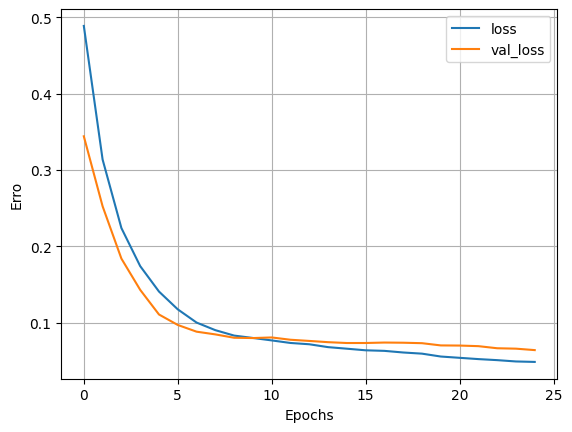

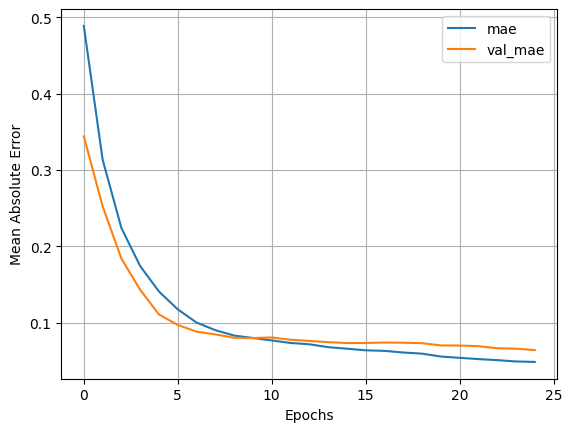

In [24]:
plot_loss(history)
plot_acc(history)

In [25]:
mlp_pred = mlp.predict(X_test).reshape(-1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [26]:
print("R² Score:", r2_score(y_true=y_test, y_pred=mlp_pred))
print("MAE:", mean_absolute_error(y_true=y_test, y_pred=mlp_pred))
print("MSE:", mean_squared_error(y_true=y_test, y_pred=mlp_pred))

R² Score: 0.6049239532585486
MAE: 0.06943826599458679
MSE: 0.008253057862377546
